In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image
import pathlib
import pandas as pd
import numpy as np

In [2]:
trainDS = tf.data.Dataset.list_files('data/train/*/*', shuffle=False)
test_ds = tf.data.Dataset.list_files('data/test/*/*', shuffle=False)

2022-11-03 15:49:02.787635: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Check dataset

In [3]:
for file in trainDS.take(3):
    print(file.numpy())

for file in test_ds.take(3):
    print(file.numpy())

b'data/train/Blotch_Apple/blotch_1.jpg'
b'data/train/Blotch_Apple/blotch_10.jpg'
b'data/train/Blotch_Apple/blotch_100.jpg'
b'data/test/Blotch_Apple/blotch_1.jpg'
b'data/test/Blotch_Apple/blotch_10.jpg'
b'data/test/Blotch_Apple/blotch_11.jpg'


Shuffle function

In [4]:
# trainDS = trainDS.shuffle(64)
# for file in trainDS.take(5):
#     print(file.numpy())

# testDS = testDS.shuffle(64)
# for file in testDS.take(3):
#     print(file.numpy())

Class Names

In [5]:
classNames = ["blotch","normal","rot","scab"]

Number of Images in Dataset

In [6]:
imageCountTrain = len(trainDS)
print (imageCountTrain)
imageCountTest = len(test_ds)
imageCountTest
print (imageCountTest)

382
120


In [7]:
val_size = int(imageCountTrain * 0.2)
train_ds = trainDS.skip(val_size)
val_ds = trainDS.take(val_size)

Images in Train, Test and Val DS

In [8]:
print (len(train_ds))
print (len(val_ds))
print (len(test_ds))

306
76
120


Getting Images and Labels for each item in the dataset

In [9]:
def get_label(file_path):
    return tf.strings.split(file_path, os.path.sep)[-2]

In [27]:
def process_image(file_path):
    label = get_label(file_path)
    
    img = tf.io.read_file(file_path)
    img=tf.image.decode_jpeg(img)
    # img=tf.image.resize(img, [360,360]) nog fixen?

    return img, label

In [11]:
for t in train_ds.take(4):
    print(t.numpy())

b'data/train/Blotch_Apple/blotch_63.jpg'
b'data/train/Blotch_Apple/blotch_64.jpg'
b'data/train/Blotch_Apple/blotch_65.jpg'
b'data/train/Blotch_Apple/blotch_66.jpg'


In [12]:
train_ds = train_ds.map(process_image)
for img, label in train_ds.take(3):
    print("Image: ", img)
    print("Label: ",label)

Image:  tf.Tensor(
[[[116.       117.       112.      ]
  [116.       117.       112.      ]
  [116.       117.       112.      ]
  ...
  [154.58836  153.58836  151.58836 ]
  [155.07616  154.07616  152.07616 ]
  [156.0254   155.0254   153.0254  ]]

 [[116.       117.       112.      ]
  [116.       117.       112.      ]
  [116.       117.       112.      ]
  ...
  [154.02083  153.02083  151.02083 ]
  [155.       154.       152.      ]
  [155.       154.       152.      ]]

 [[116.       117.       112.      ]
  [116.       117.       112.      ]
  [116.       117.       112.      ]
  ...
  [156.36806  155.36806  153.36806 ]
  [156.28218  155.28218  153.28218 ]
  [155.36806  154.36806  152.36806 ]]

 ...

 [[116.       116.       114.      ]
  [116.       116.       114.      ]
  [116.       116.       114.      ]
  ...
  [147.38892  147.38892  147.38892 ]
  [149.       149.       149.      ]
  [145.92218  143.92218  144.92218 ]]

 [[114.922226 114.922226 112.922226]
  [116.       116.

In [13]:
test_ds = test_ds.map(process_image)
for img, label in test_ds.take(3):
    print("Image: ", img)
    print("Label: ",label)

Image:  tf.Tensor(
[[[146.       149.       140.      ]
  [146.55417  149.55417  140.55417 ]
  [147.51389  150.51389  141.51389 ]
  ...
  [122.22917  115.22917  109.22917 ]
  [123.44585  116.44585  110.44585 ]
  [124.       117.       111.      ]]

 [[147.46666  150.46666  141.46666 ]
  [148.02083  151.02083  142.02083 ]
  [148.79213  151.79213  142.79213 ]
  ...
  [122.417595 115.417595 109.417595]
  [123.772804 116.772804 110.772804]
  [124.73333  117.73333  111.73333 ]]

 [[149.66667  152.66667  144.77777 ]
  [149.91296  152.91296  145.02408 ]
  [150.22531  153.22531  145.33643 ]
  ...
  [121.93056  114.93056  107.81945 ]
  [123.336136 116.336136 109.22503 ]
  [124.44444  117.44444  110.333336]]

 ...

 [[113.111084 114.111084 108.111084]
  [113.66525  114.66525  108.66525 ]
  [114.739174 115.739174 109.22528 ]
  ...
  [113.70905  114.70905  109.70905 ]
  [116.51018  117.51018  112.51018 ]
  [118.111084 119.111084 114.111084]]

 [[111.20001  112.20001  106.20001 ]
  [111.901955 112.

In [14]:
val_ds = val_ds.map(process_image)
for img, label in val_ds.take(3):
    print("Image: ", img)
    print("Label: ",label)

Image:  tf.Tensor(
[[[93.       94.       89.      ]
  [93.       94.       89.      ]
  [92.701385 93.701385 88.701385]
  ...
  [86.59723  90.701385 85.      ]
  [86.       91.       85.      ]
  [86.       91.       85.      ]]

 [[93.308334 94.308334 89.308334]
  [93.12975  94.12975  89.12975 ]
  [92.701385 93.701385 88.701385]
  ...
  [86.59723  90.701385 85.      ]
  [86.       91.       85.      ]
  [86.       91.       85.      ]]

 [[93.84722  94.84722  89.84722 ]
  [93.35654  94.35654  89.35654 ]
  [92.701385 93.701385 88.701385]
  ...
  [86.59723  90.701385 85.      ]
  [86.       91.       85.      ]
  [86.       91.       85.      ]]

 ...

 [[63.       68.       62.      ]
  [63.579166 68.57917  62.579166]
  [61.61111  66.611115 60.61111 ]
  ...
  [14.667441 14.667441 14.667441]
  [21.10284  21.10284  21.10284 ]
  [27.20819  27.20819  27.20819 ]]

 [[63.       68.       62.      ]
  [63.579166 68.57917  62.579166]
  [61.61111  66.611115 60.61111 ]
  ...
  [27.922756 27.922

Scale function

In [15]:
def scale(image, label):
    return image/255, label

In [16]:
train_ds = train_ds.map(scale)
for image, label in train_ds.take(5):
   print ("****Image: ",image.numpy()[0][0])
   print ("****Label: ",label.numpy() )

****Image:  [0.45490196 0.45882353 0.4392157 ]
****Label:  b'Blotch_Apple'
****Image:  [0.07051561 0.148947   0.19208425]
****Label:  b'Blotch_Apple'
****Image:  [0.36235294 0.38196078 0.35843137]
****Label:  b'Blotch_Apple'
****Image:  [0.432244   0.44008714 0.3969499 ]
****Label:  b'Blotch_Apple'
****Image:  [0.6765305  0.59417754 0.71574616]
****Label:  b'Blotch_Apple'


In [17]:
test_ds = test_ds.map(scale)
for image, label in test_ds.take(5):
   print ("****Image: ",image.numpy()[0][0])
   print ("****Label: ",label.numpy() )

****Image:  [0.57254905 0.58431375 0.54901963]
****Label:  b'Blotch_Apple'
****Image:  [0.61960787 0.45490196 0.        ]
****Label:  b'Blotch_Apple'
****Image:  [0.654902   0.5764706  0.29803923]
****Label:  b'Blotch_Apple'
****Image:  [0.5686275  0.60784316 0.36862746]
****Label:  b'Blotch_Apple'
****Image:  [0.39215687 0.41568628 0.26666668]
****Label:  b'Blotch_Apple'


In [18]:
val_ds = val_ds.map(scale)
for image, label in val_ds.take(5):
   print ("****Image: ",image.numpy()[0][0])
   print ("****Label: ",label.numpy() )

****Image:  [0.3647059  0.36862746 0.34901962]
****Label:  b'Blotch_Apple'
****Image:  [0. 0. 0.]
****Label:  b'Blotch_Apple'
****Image:  [0.6862745  0.59607846 0.7058824 ]
****Label:  b'Blotch_Apple'
****Image:  [0.68235296 0.7058824  0.7921569 ]
****Label:  b'Blotch_Apple'
****Image:  [0.35686275 0.43529412 0.20392157]
****Label:  b'Blotch_Apple'


These operations can be chained but i kept them separate for clarity and possibly oop.

In [19]:
list_trainDS = tf.data.Dataset.list_files(str('data/train/*/*'))
list_train_ds = list_trainDS.skip(val_size)
list_val_ds = trainDS.take(val_size)
list_test_ds = tf.data.Dataset.list_files(str('data/test/*/*'))

In [20]:
print (len(list_train_ds))
print (len(list_test_ds))
print (len(list_val_ds))

306
120
76


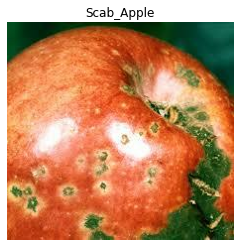

In [28]:
file_path = next(iter(list_train_ds))
image, label = process_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)

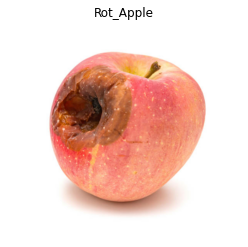

In [29]:
images_train_ds = list_train_ds.map(process_image)

for image, label in images_train_ds.take(1):
  show(image, label)

Rotate image

In [30]:
import scipy.ndimage as ndimage

def random_rotate_image(image):
  image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
  return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


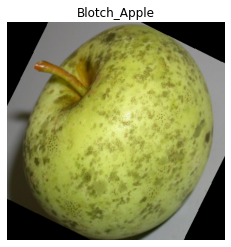

In [31]:
image, label = next(iter(train_ds))
image = random_rotate_image(image)
show(image, label)

In [32]:
def tf_random_rotate_image(image, label):
  im_shape = image.shape
  [image,] = tf.py_function(random_rotate_image, [image], [tf.float32])
  image.set_shape(im_shape)
  return image, label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

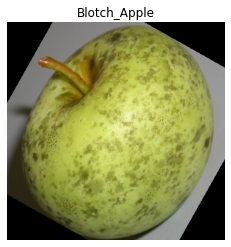

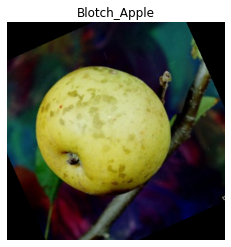

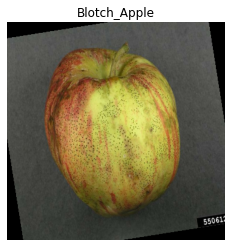

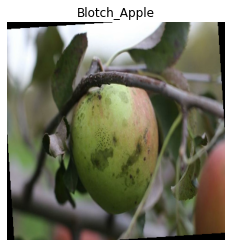

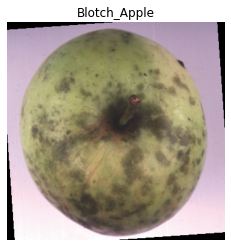

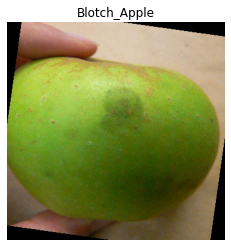

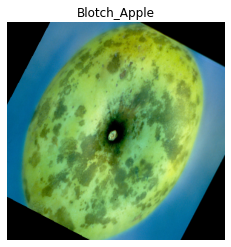

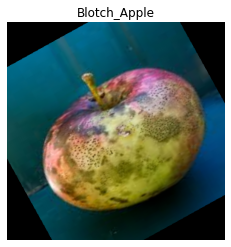

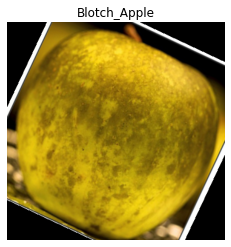

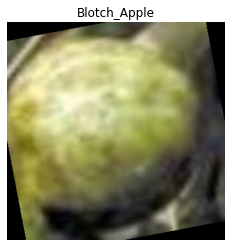

In [35]:
rot_ds = train_ds.map(tf_random_rotate_image)

for image, label in rot_ds.take(10):
  show(image, label)